In [1]:
#installation of packages
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from statsmodels.formula.api import logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
import statistics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the online purchasing csv file to be used. 
#view dataset to ensure proper loading.
df = pd.read_csv('onlinepurchasing.csv')
pd.set_option('display.max_columns', None)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
#finding duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Length: 12330, dtype: bool

In [6]:
df.drop_duplicates(keep='last', inplace=True)

In [7]:
df.shape

(12205, 18)

In [8]:
#finding nulls
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
#finding outliers
def find_outliers(df, var):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    IQR = q3 - q1
    lowerbound = q1-(1.5*IQR)
    upperbound = q3+(1.5*IQR)
    outliers = df[var][((df[var] < (lowerbound)) | (df[var] > (upperbound)))]
    return outliers

#running created function on quantitative variables

outliers = find_outliers(df, 'Administrative')
print("number of outliers in Administrative: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Administrative_Duration')
print("number of outliers in Administrative_Duration: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Informational')
print("number of outliers in Informational: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Informational_Duration')
print("number of outliers in Informational_Duration: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'ProductRelated')
print("number of outliers in ProductRelated: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'ProductRelated_Duration')
print("number of outliers in ProductRelated_Duration: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'BounceRates')
print("number of outliers in BounceRates: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'ExitRates')
print("number of outliers in ExitRates: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'PageValues')
print("number of outliers in PageValues: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'SpecialDay')
print("number of outliers in SpecialDay: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Administrative: 404
max outlier value: 27
min outlier value: 11
number of outliers in Administrative_Duration: 1149
max outlier value: 3398.75
min outlier value: 236.8
number of outliers in Informational: 2631
max outlier value: 24
min outlier value: 1
number of outliers in Informational_Duration: 2405
max outlier value: 2549.375
min outlier value: 1.0
number of outliers in ProductRelated: 1007
max outlier value: 705
min outlier value: 84
number of outliers in ProductRelated_Duration: 951
max outlier value: 63973.52223
min outlier value: 3408.266667
number of outliers in BounceRates: 1428
max outlier value: 0.2
min outlier value: 0.041843972
number of outliers in ExitRates: 1325
max outlier value: 0.2
min outlier value: 0.1
number of outliers in PageValues: 2730
max outlier value: 361.7637419
min outlier value: 0.038034542
number of outliers in SpecialDay: 1249
max outlier value: 1.0
min outlier value: 0.2


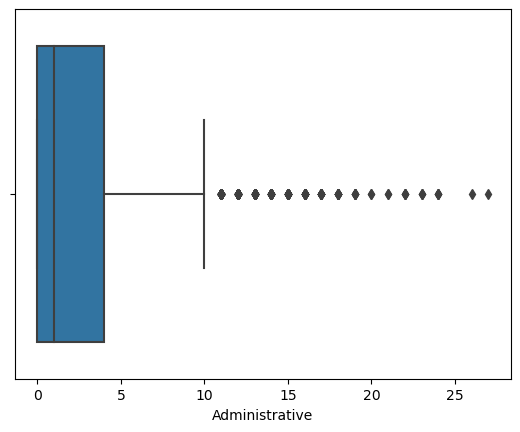

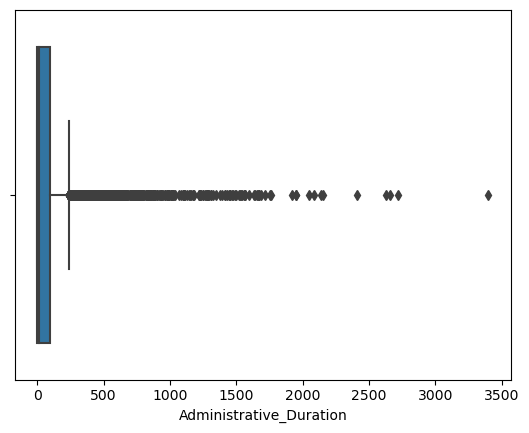

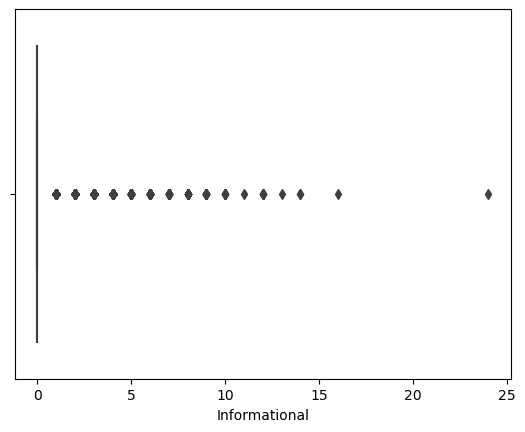

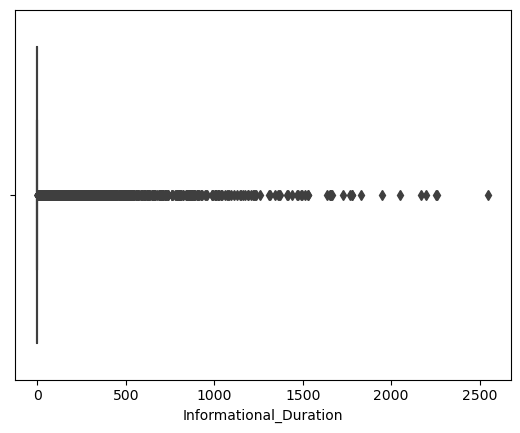

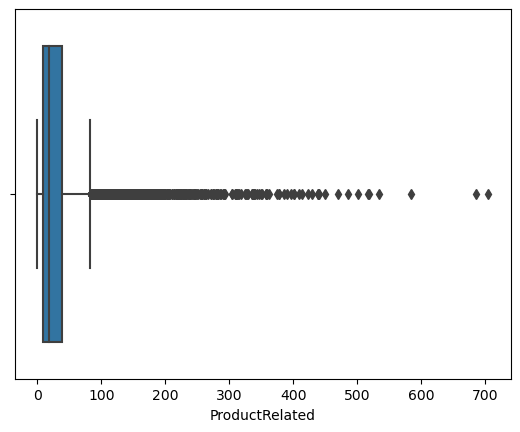

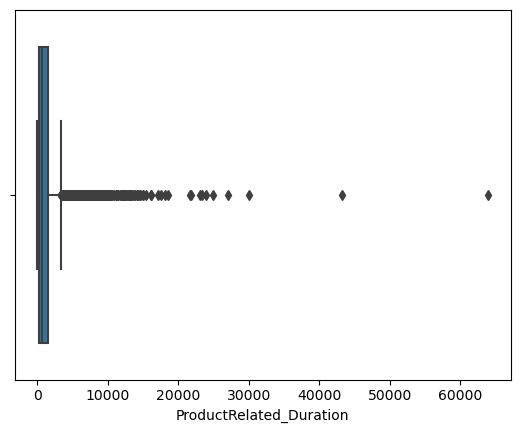

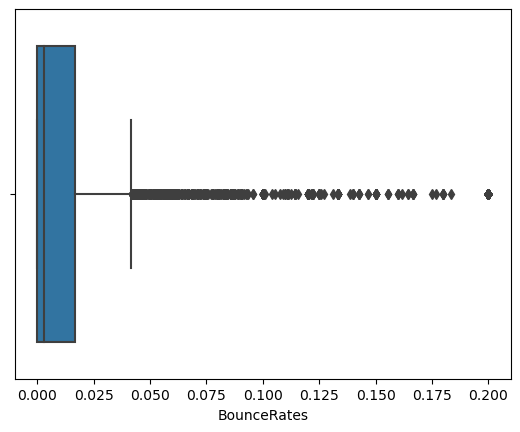

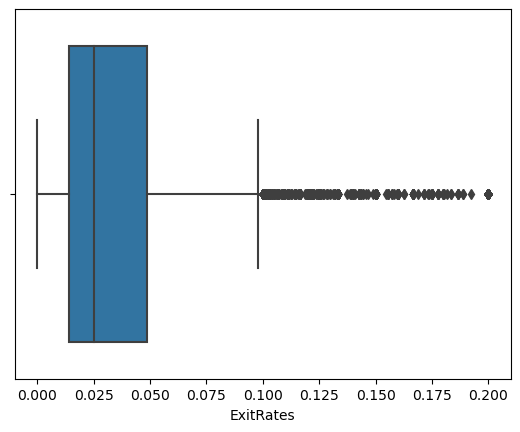

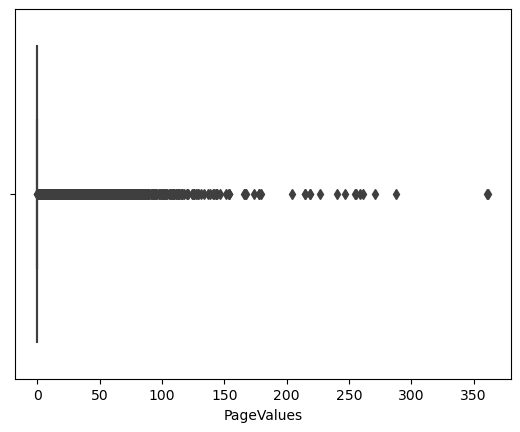

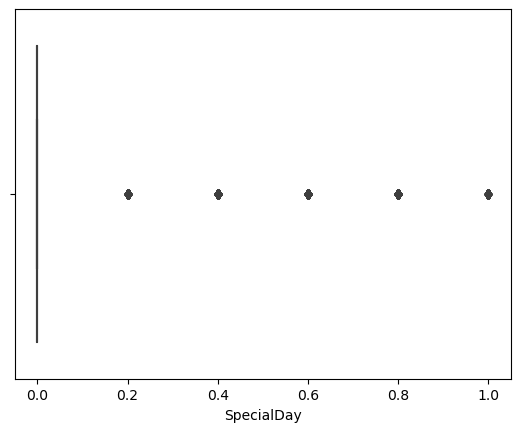

In [10]:
#boxplotting all variables showing outliers
boxplot=sns.boxplot(x='Administrative',data=df)
plt.show()
boxplot=sns.boxplot(x='Administrative_Duration',data=df)
plt.show()
boxplot=sns.boxplot(x='Informational',data=df)
plt.show()
boxplot=sns.boxplot(x='Informational_Duration',data=df)
plt.show()
boxplot=sns.boxplot(x='ProductRelated',data=df)
plt.show()
boxplot=sns.boxplot(x='ProductRelated_Duration',data=df)
plt.show()
boxplot=sns.boxplot(x='BounceRates',data=df)
plt.show()
boxplot=sns.boxplot(x='ExitRates',data=df)
plt.show()
boxplot=sns.boxplot(x='PageValues',data=df)
plt.show()
boxplot=sns.boxplot(x='SpecialDay',data=df)
plt.show()

In [11]:
#treating outliers found.

def find_boundary(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    return lower , upper

lower_adm, upper_adm = find_boundary(df, 'Administrative' )
df.Administrative = np.where(df.Administrative > upper_adm, upper_adm,
                               np.where(df.Administrative < lower_adm, lower_adm, df.Administrative))

lower_adur, upper_adur = find_boundary(df, 'Administrative_Duration' )
df.Administrative_Duration = np.where(df.Administrative_Duration > upper_adur, upper_adur,
                               np.where(df.Administrative_Duration < lower_adur, lower_adur, df.Administrative_Duration))

lower_pr, upper_pr = find_boundary(df, 'ProductRelated' )
df.ProductRelated = np.where(df.ProductRelated > upper_pr, upper_pr,
                               np.where(df.ProductRelated < lower_pr, lower_pr, df.ProductRelated))

lower_prd, upper_prd = find_boundary(df, 'ProductRelated_Duration' )
df.ProductRelated_Duration = np.where(df.ProductRelated_Duration > upper_prd, upper_prd,
                               np.where(df.ProductRelated_Duration < lower_prd, lower_prd, df.ProductRelated_Duration))

lower_bou, upper_bou = find_boundary(df, 'BounceRates' )
df.BounceRates = np.where(df.BounceRates > upper_bou, upper_bou,
                               np.where(df.BounceRates < lower_bou, lower_bou, df.BounceRates))

lower_ex, upper_ex = find_boundary(df, 'ExitRates' )
df.ExitRates = np.where(df.ExitRates > upper_ex, upper_ex,
                               np.where(df.ExitRates < lower_ex, lower_ex, df.ExitRates))

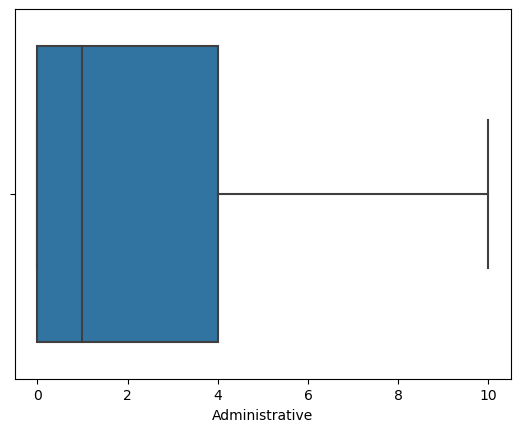

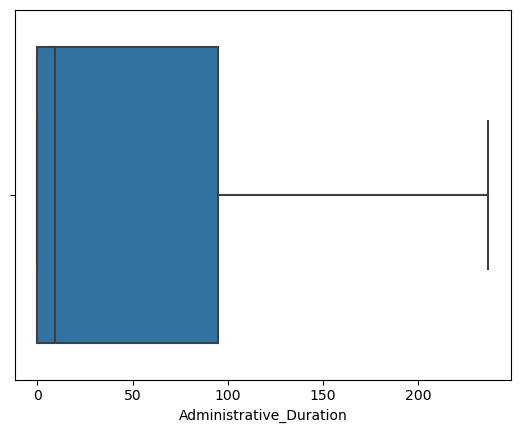

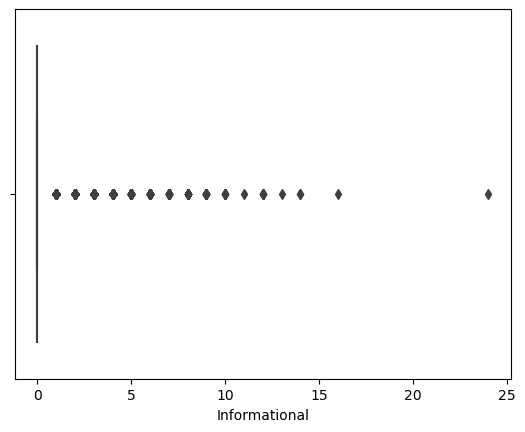

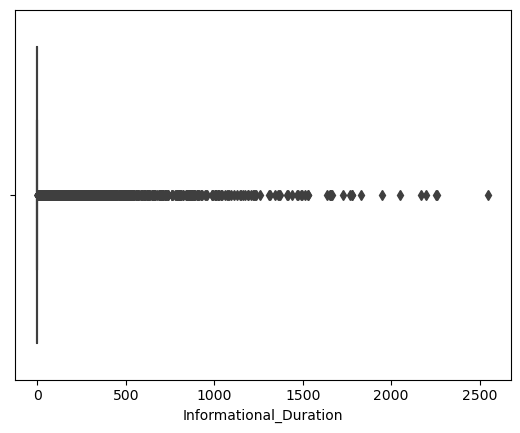

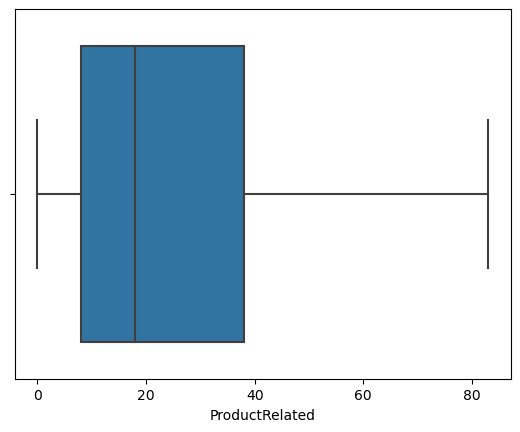

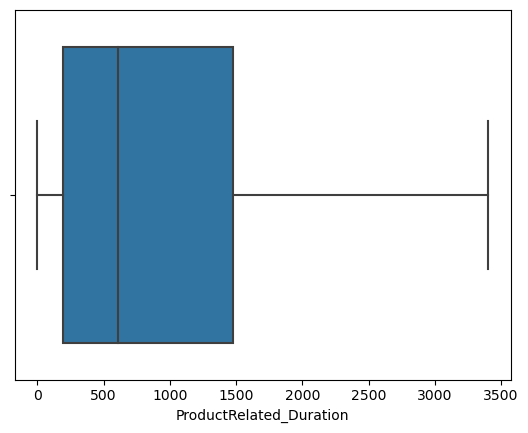

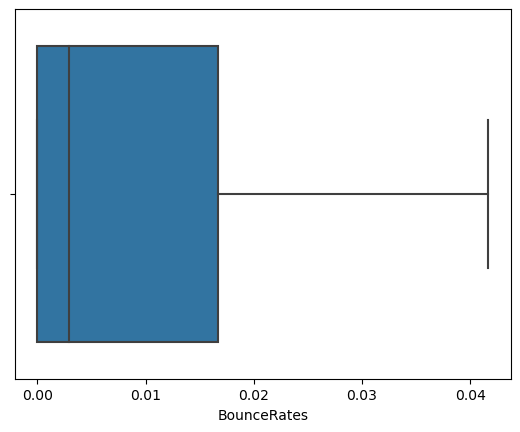

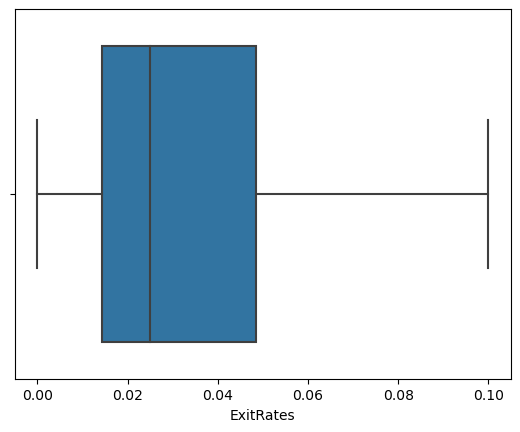

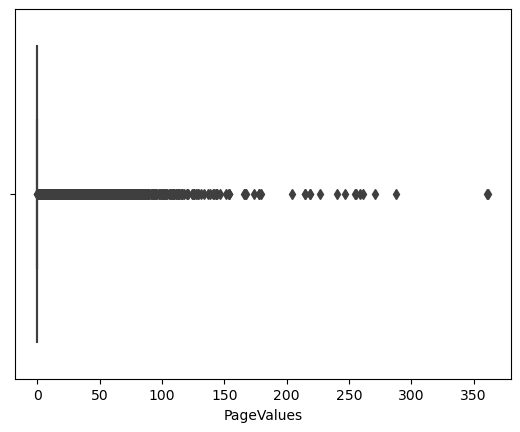

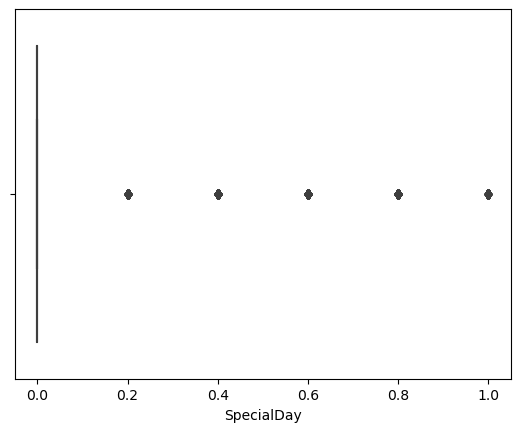

In [12]:
#re-boxplotting all variables showing outliers
boxplot=sns.boxplot(x='Administrative',data=df)
plt.show()
boxplot=sns.boxplot(x='Administrative_Duration',data=df)
plt.show()
boxplot=sns.boxplot(x='Informational',data=df)
plt.show()
boxplot=sns.boxplot(x='Informational_Duration',data=df)
plt.show()
boxplot=sns.boxplot(x='ProductRelated',data=df)
plt.show()
boxplot=sns.boxplot(x='ProductRelated_Duration',data=df)
plt.show()
boxplot=sns.boxplot(x='BounceRates',data=df)
plt.show()
boxplot=sns.boxplot(x='ExitRates',data=df)
plt.show()
boxplot=sns.boxplot(x='PageValues',data=df)
plt.show()
boxplot=sns.boxplot(x='SpecialDay',data=df)
plt.show()

In [13]:
#summary statistics
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.221303,57.899459,0.508726,34.825454,26.835887,1001.332641,0.010568,0.035474,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,2.931051,80.206380,1.275617,141.424807,24.870099,1036.985399,0.014521,0.029252,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,10.000000,236.750000,24.000000,2549.375000,83.000000,3403.386905,0.041667,0.099977,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [14]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [15]:
#locating cardinality of variables
print(f'Administrative: {df.Administrative.nunique()}')
print(f'Administrative_Duration: {df.Administrative_Duration.nunique()}')
print(f'Informational: {df.Informational.nunique()}')
print(f'Informational_Duration: {df.Informational_Duration.nunique()}')
print(f'ProductRelated: {df.ProductRelated.nunique()}')
print(f'ProductRelated_Duration: {df.ProductRelated_Duration.nunique()}')
print(f'BounceRates: {df.BounceRates.nunique()}')
print(f'ExitRates: {df.ExitRates.nunique()}')
print(f'PageValues: {df.PageValues.nunique()}')
print(f'SpecialDay: {df.SpecialDay.nunique()}')
print(f'Month: {df.Month.nunique()}')
print(f'OperatingSystems: {df.OperatingSystems.nunique()}')
print(f'Browser: {df.Browser.nunique()}')
print(f'Region: {df.Region.nunique()}')
print(f'TrafficType: {df.TrafficType.nunique()}')
print(f'VisitorType: {df.VisitorType.nunique()}')
print(f'Weekend: {df.Browser.nunique()}')
print(f'Revenue: {df.Region.nunique()}')

Administrative: 11
Administrative_Duration: 2258
Informational: 17
Informational_Duration: 1258
ProductRelated: 84
ProductRelated_Duration: 8601
BounceRates: 1678
ExitRates: 4674
PageValues: 2704
SpecialDay: 6
Month: 10
OperatingSystems: 8
Browser: 13
Region: 9
TrafficType: 20
VisitorType: 3
Weekend: 13
Revenue: 9


In [16]:
#dropping categorical unneeded variables
df.drop(['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType'], axis=1, inplace=True)

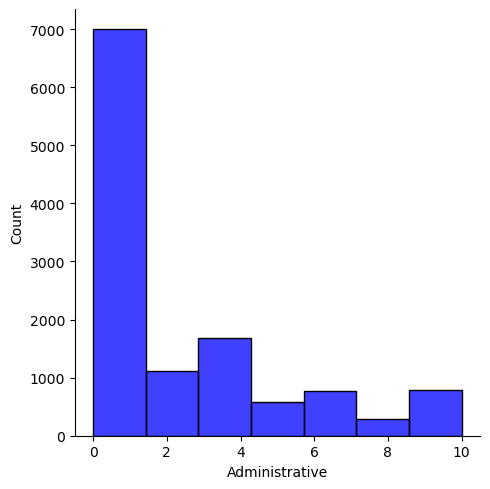

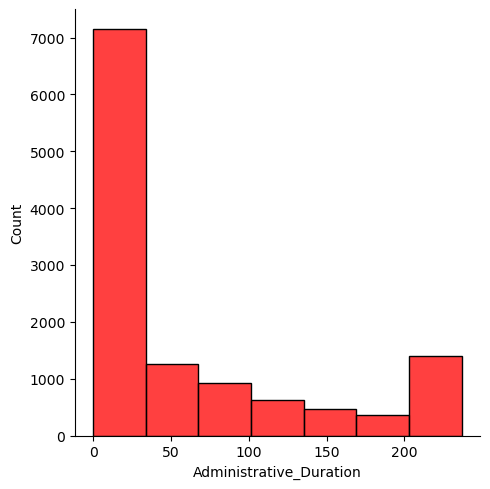

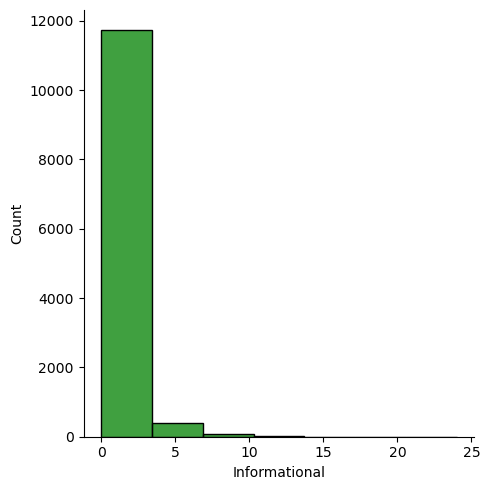

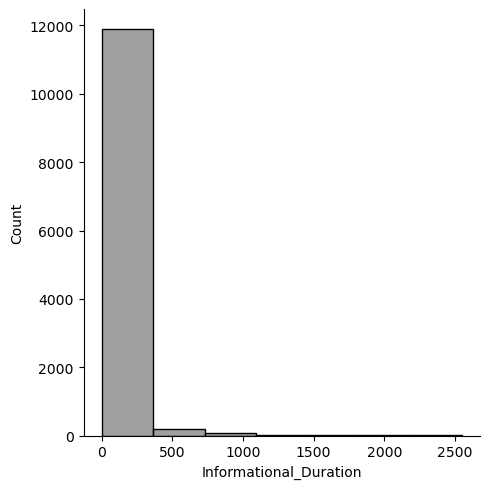

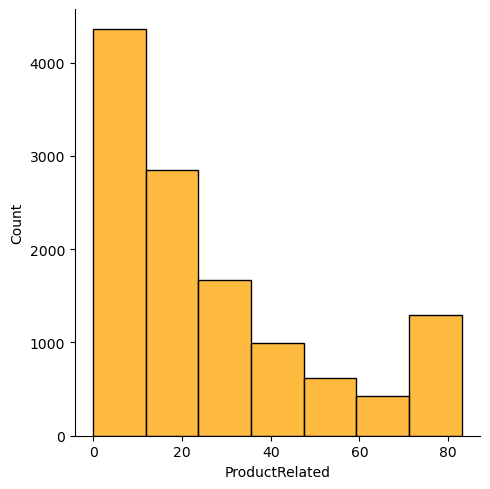

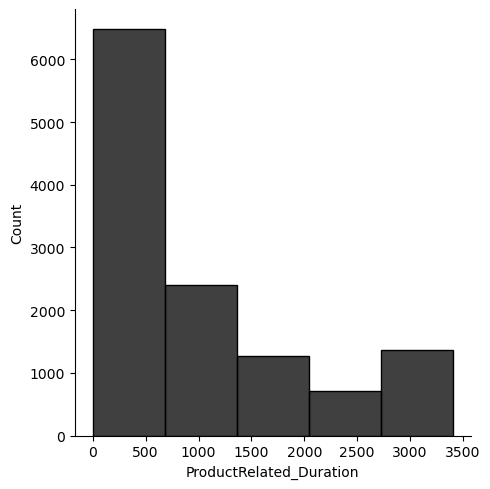

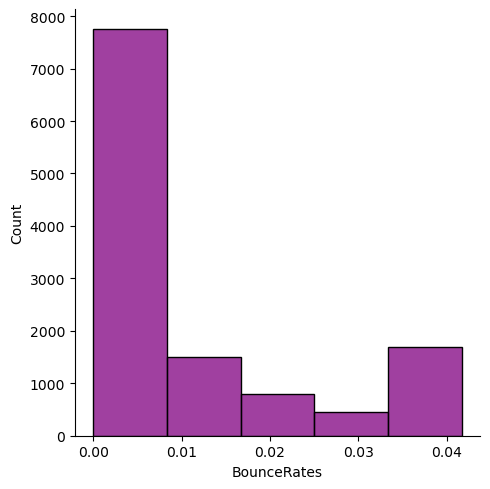

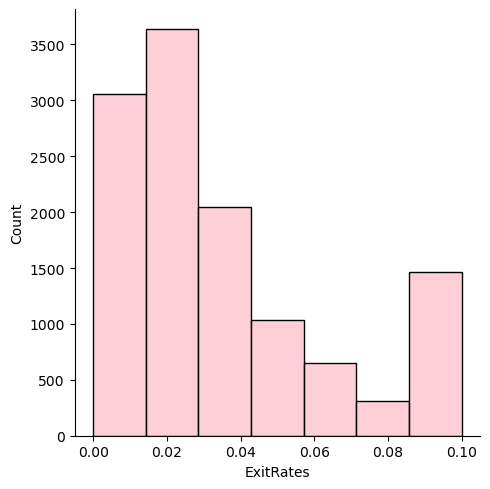

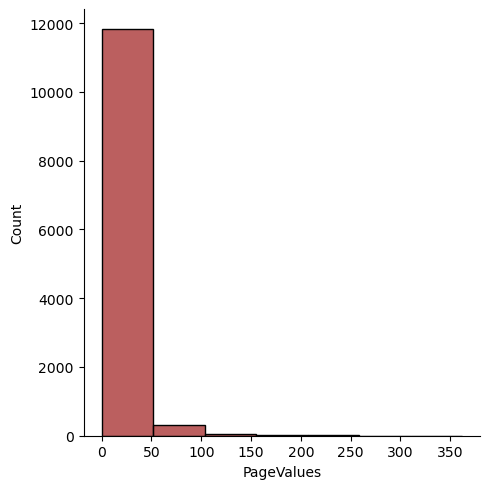

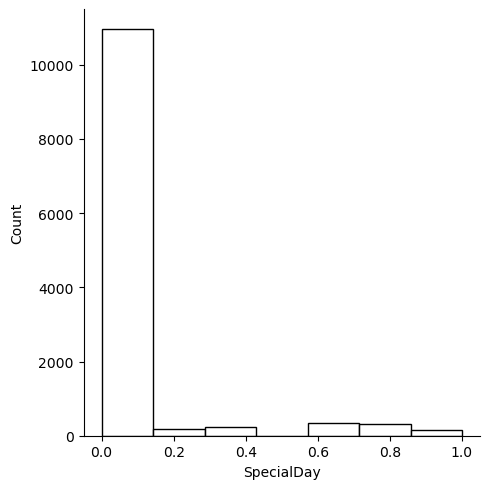

In [17]:
#univariate statistics, via distplots for quantitative explanatory variables

sns.displot(df['Administrative'], kde=False, color='blue', bins=7)
sns.displot(df['Administrative_Duration'], kde=False, color='red', bins=7)
sns.displot(df['Informational'], kde=False, color='green', bins=7)
sns.displot(df['Informational_Duration'], kde=False, color='gray', bins=7)
sns.displot(df['ProductRelated'], kde=False, color='orange', bins=7)
sns.displot(df['ProductRelated_Duration'], kde=False, color='black', bins=5)
sns.displot(df['BounceRates'], kde=False, color='purple', bins=5)
sns.displot(df['ExitRates'], kde=False, color='pink', bins=7)
sns.displot(df['PageValues'], kde=False, color='brown', bins=7)
sns.displot(df['SpecialDay'], kde=False, color='white', bins=7)

<AxesSubplot: xlabel='Weekend'>

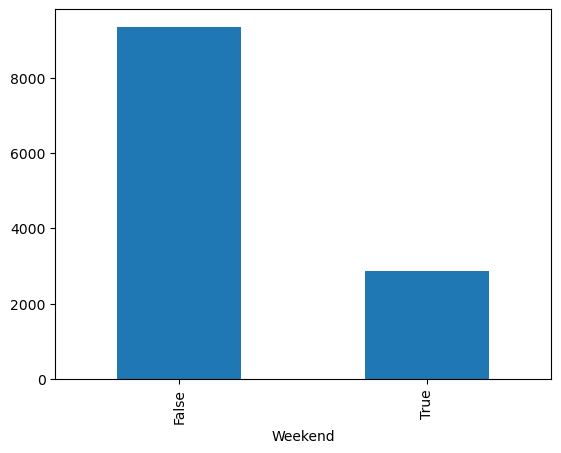

In [18]:
# univariate statistics, via barplots for categorical explanatory variables

groupedWeekEnd = df.groupby(by='Weekend').size()
groupedWeekEnd
%matplotlib inline
groupedWeekEnd.plot.bar()

<AxesSubplot: xlabel='VisitorType'>

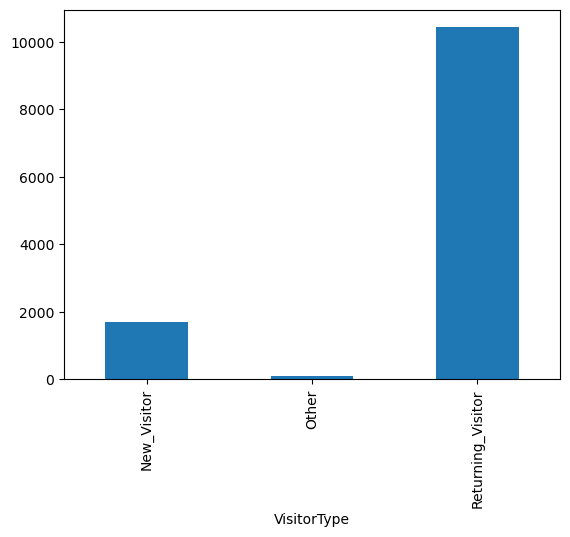

In [19]:
groupedVisitor = df.groupby(by='VisitorType').size()
groupedVisitor
%matplotlib inline
groupedVisitor.plot.bar()

<AxesSubplot: xlabel='Revenue'>

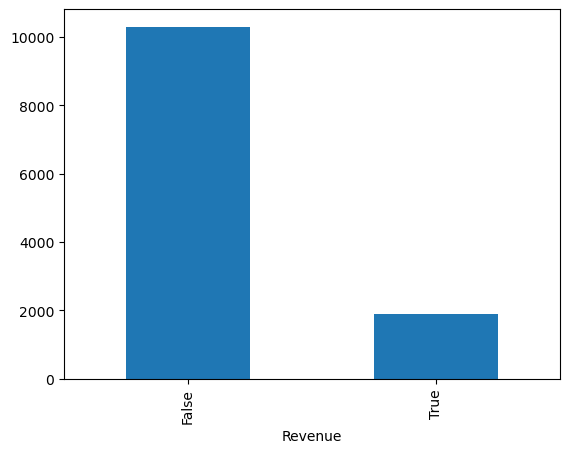

In [20]:
groupedRevenue = df.groupby(by='Revenue').size()
groupedRevenue
%matplotlib inline
groupedRevenue.plot.bar()

In [21]:
#bivariate statistics visualizations 
# 2 categorical variables using crosstab table and barplot
 
rv_crosstab=pd.crosstab(index=df['Revenue'], columns=df['VisitorType'])
print(rv_crosstab)

VisitorType  New_Visitor  Other  Returning_Visitor
Revenue                                           
False               1271     65               8961
True                 422     16               1470


<AxesSubplot: xlabel='Revenue'>

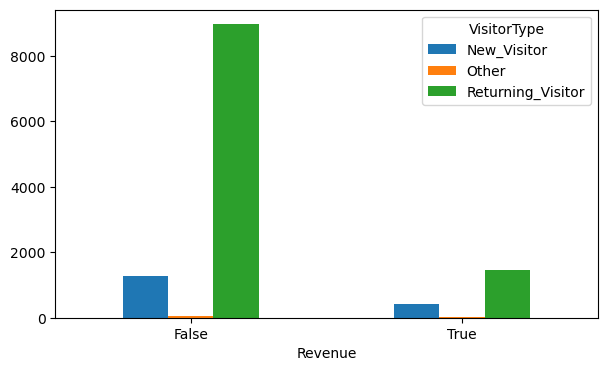

In [22]:
rv_crosstab.plot.bar(figsize=(7,4), rot=0)

In [23]:
rw_crosstab=pd.crosstab(index=df['Revenue'], columns=df['Weekend'])
print(rw_crosstab)

Weekend  False  True
Revenue             
False     7937  2360
True      1409   499


<AxesSubplot: xlabel='Revenue'>

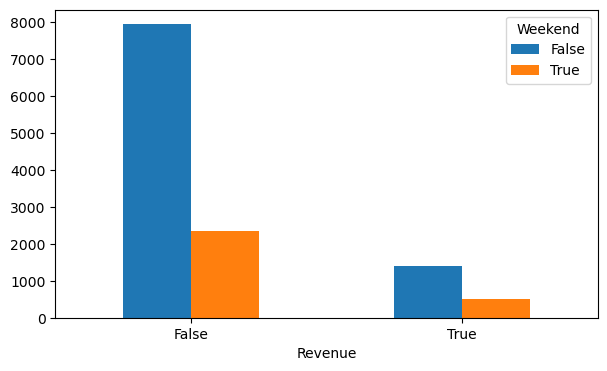

In [24]:
rw_crosstab.plot.bar(figsize=(7,4), rot=0)

<AxesSubplot: xlabel='Revenue', ylabel='Administrative'>

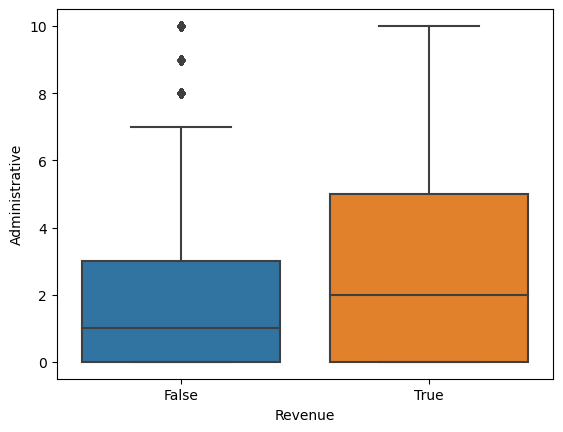

In [26]:
# bivariate statistics of categorical/continuous variable via boxplots

sns.boxplot(data=df, x="Revenue", y="Administrative")


<AxesSubplot: xlabel='Revenue', ylabel='Administrative_Duration'>

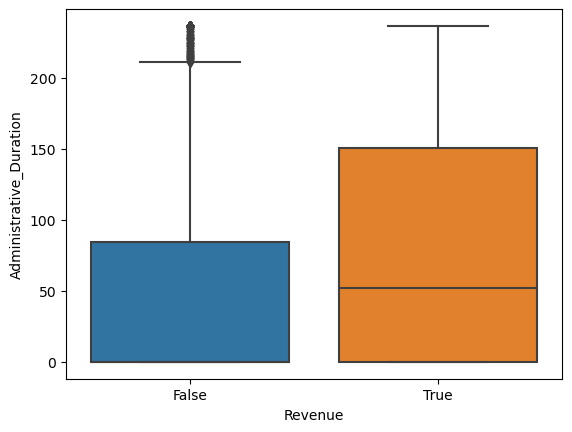

In [27]:
sns.boxplot(data=df, x="Revenue", y="Administrative_Duration")

<AxesSubplot: xlabel='Revenue', ylabel='Informational'>

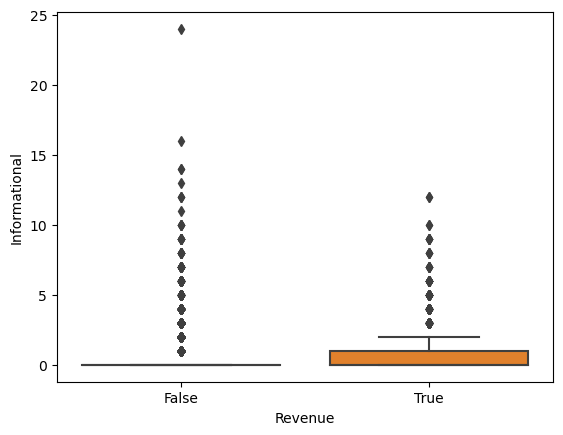

In [28]:
sns.boxplot(data=df, x="Revenue", y="Informational")

<AxesSubplot: xlabel='Revenue', ylabel='Informational_Duration'>

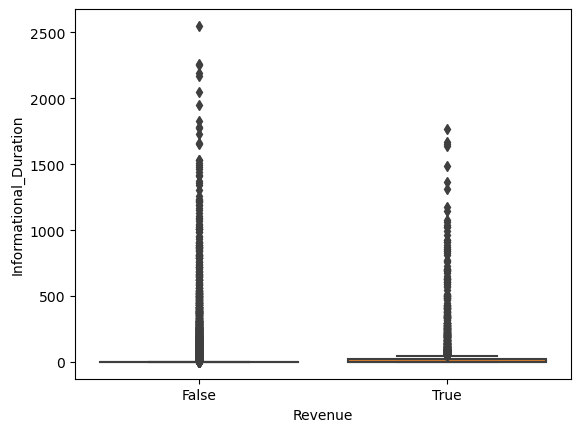

In [29]:
sns.boxplot(data=df, x="Revenue", y="Informational_Duration")

<AxesSubplot: xlabel='Revenue', ylabel='ProductRelated'>

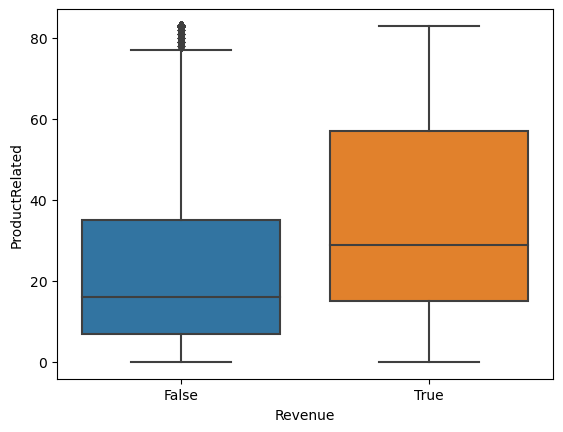

In [30]:
sns.boxplot(data=df, x="Revenue", y="ProductRelated")

<AxesSubplot: xlabel='Revenue', ylabel='ProductRelated_Duration'>

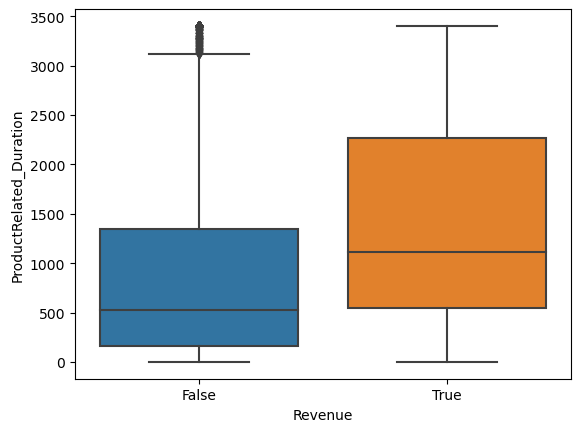

In [31]:
sns.boxplot(data=df, x="Revenue", y="ProductRelated_Duration")

<AxesSubplot: xlabel='Revenue', ylabel='BounceRates'>

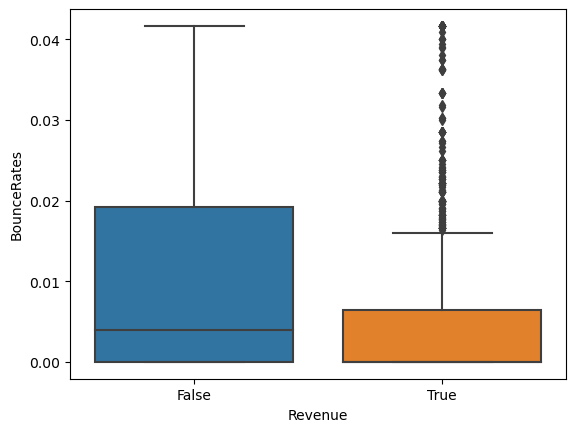

In [32]:
sns.boxplot(data=df, x="Revenue", y="BounceRates")

<AxesSubplot: xlabel='Revenue', ylabel='ExitRates'>

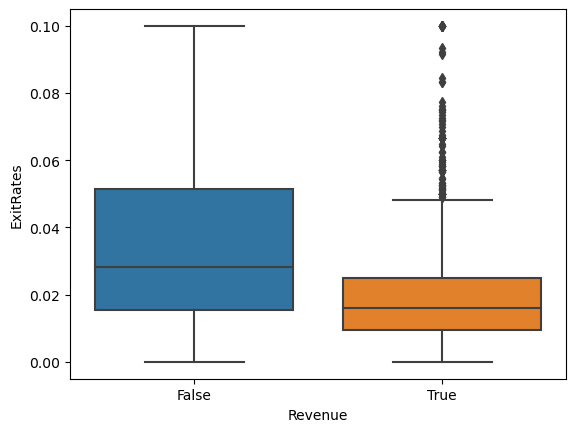

In [33]:
sns.boxplot(data=df, x="Revenue", y="ExitRates")

<AxesSubplot: xlabel='Revenue', ylabel='PageValues'>

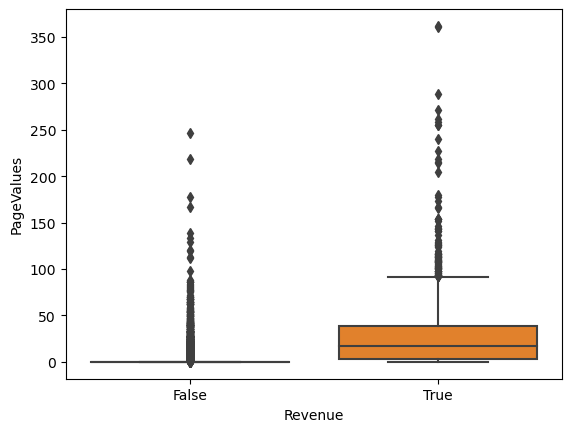

In [34]:
sns.boxplot(data=df, x="Revenue", y="PageValues")

<AxesSubplot: xlabel='Revenue', ylabel='SpecialDay'>

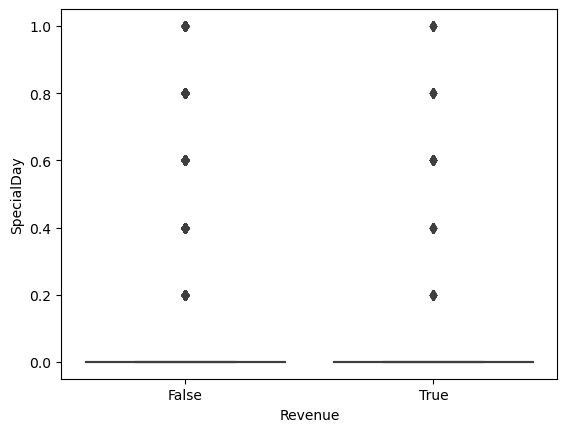

In [35]:
sns.boxplot(data=df, x="Revenue", y="SpecialDay")

In [36]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [37]:
#re-expression of categorical variables
#convert ordinal categorical to numerical

df['Weekend']=df['Weekend'].astype('category')
df['Weekend']=df['Weekend'].cat.codes
df['Revenue']=df['Revenue'].astype('category')
df['Revenue']=df['Revenue'].cat.codes

In [38]:
#utilizing get_dummies to convert nominal categorical to numerical
df= pd.get_dummies(df, columns=['VisitorType'], prefix_sep=" " , drop_first=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12205 non-null  float64
 1   Administrative_Duration        12205 non-null  float64
 2   Informational                  12205 non-null  int64  
 3   Informational_Duration         12205 non-null  float64
 4   ProductRelated                 12205 non-null  float64
 5   ProductRelated_Duration        12205 non-null  float64
 6   BounceRates                    12205 non-null  float64
 7   ExitRates                      12205 non-null  float64
 8   PageValues                     12205 non-null  float64
 9   SpecialDay                     12205 non-null  float64
 10  Weekend                        12205 non-null  int8   
 11  Revenue                        12205 non-null  int8   
 12  VisitorType Other              12205 non-null 

In [40]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'VisitorType Other', 'VisitorType Returning_Visitor'],
      dtype='object')

In [41]:
X=df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'VisitorType Other', 'VisitorType Returning_Visitor']]

vif_data = pd.DataFrame()
vif_data["Explanatory Variables"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data=vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

            Explanatory Variables   VIF
4                  ProductRelated  8.76
5         ProductRelated_Duration  7.32
7                       ExitRates  5.76
12  VisitorType Returning_Visitor  5.46
0                  Administrative  5.23
1         Administrative_Duration  4.61
6                     BounceRates  3.34
2                   Informational  2.11
3          Informational_Duration  1.73
10                        Weekend  1.26
9                      SpecialDay  1.14
8                      PageValues  1.12
11              VisitorType Other  1.03


In [42]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,VisitorType Other,VisitorType Returning_Visitor
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.221303,57.899459,0.508726,34.825454,26.835887,1001.332641,0.010568,0.035474,5.949574,0.061942,0.234248,0.156329,0.006637,0.854650
std,2.931051,80.206380,1.275617,141.424807,24.870099,1036.985399,0.014521,0.029252,18.653671,0.199666,0.423545,0.363182,0.081198,0.352468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10.000000,236.750000,24.000000,2549.375000,83.000000,3403.386905,0.041667,0.099977,361.763742,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#logistic regression model
df['const']=1
y= df['Revenue']
X= df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'VisitorType Other', 'VisitorType Returning_Visitor','const']]
log_model = sm.Logit(y,X)
results = log_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.302019
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                12205
Model:                          Logit   Df Residuals:                    12191
Method:                           MLE   Df Model:                           13
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3034
Time:                        11:45:32   Log-Likelihood:                -3686.1
converged:                       True   LL-Null:                       -5291.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Administrative                    0.0052      0.017      0.310      0.

In [44]:
y= df['Revenue'] 
X= df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'VisitorType Other', 'VisitorType Returning_Visitor','const']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [46]:
scaler = RobustScaler()

In [47]:
X_train = scaler.fit_transform(X_train)

In [48]:
X_test= scaler.transform(X_test)

In [49]:
log_r= LogisticRegression(random_state=0).fit(X_train, y_train)

In [50]:
y_pred= log_r.predict(X_test)

In [51]:
log_r.score(X_train, y_train)

0.8813063326700222

In [52]:
confusion_matrix(y_test, y_pred)

array([[3035,   67],
       [ 352,  208]], dtype=int64)

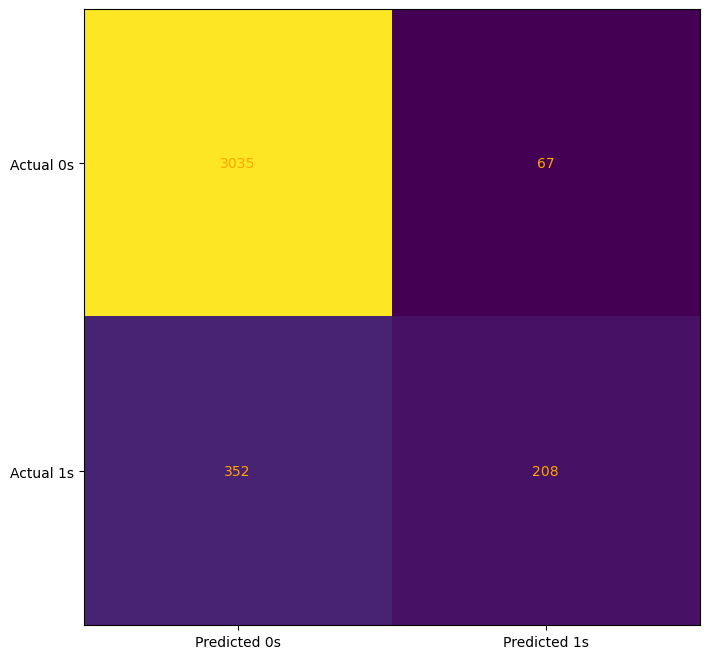

In [53]:
matrix_i = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix_i)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix_i[i, j], ha='center', va='center', color='orange')
plt.show()

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3102
           1       0.76      0.37      0.50       560

    accuracy                           0.89      3662
   macro avg       0.83      0.67      0.72      3662
weighted avg       0.87      0.89      0.87      3662



In [55]:
#reduced model via backward stepwise elmination with p-values less than 0.05

df['const']=1
y= df['Revenue']
X=df[['ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'VisitorType Returning_Visitor','const']]
log_model_red = sm.Logit(y,X)
redu_results = log_model_red.fit()
print(redu_results.summary())

Optimization terminated successfully.
         Current function value: 0.302230
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                12205
Model:                          Logit   Df Residuals:                    12196
Method:                           MLE   Df Model:                            8
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3029
Time:                        11:46:51   Log-Likelihood:                -3688.7
converged:                       True   LL-Null:                       -5291.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
ProductRelated                    0.0051      0.002      2.329      0.

In [56]:
y= df['Revenue']
X=df[['ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'VisitorType Returning_Visitor','const']]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [58]:
scaler = RobustScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [60]:
X_test= scaler.transform(X_test)

In [61]:
logr= LogisticRegression(random_state=0).fit(X_train, y_train)

In [62]:
logr.score(X_test, y_test)

0.8847624249044238

In [63]:
y_predr= logr.predict(X_test)

In [64]:
confusion_matrix(y_test, y_predr)

array([[3035,   67],
       [ 355,  205]], dtype=int64)

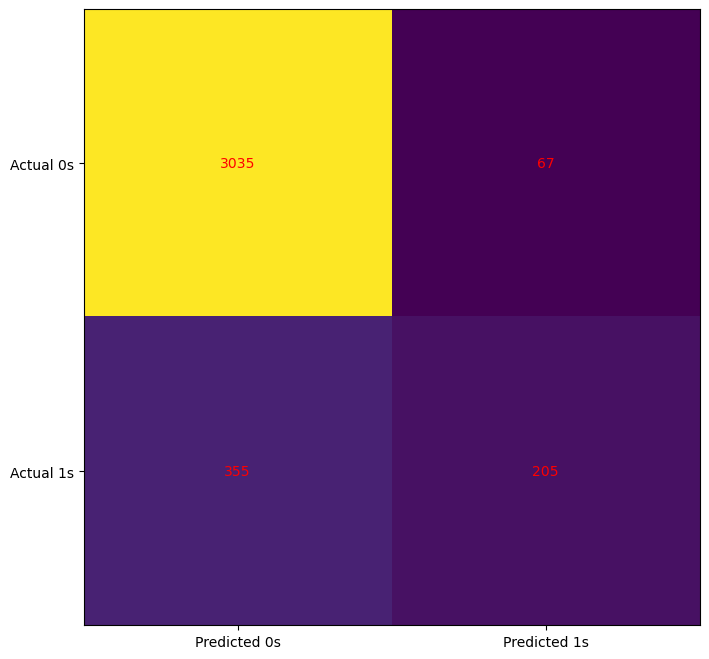

In [65]:
matrix = confusion_matrix(y_test, y_predr)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='red')
plt.show()

In [66]:
print(classification_report(y_test, y_predr))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      3102
           1       0.75      0.37      0.49       560

    accuracy                           0.88      3662
   macro avg       0.82      0.67      0.71      3662
weighted avg       0.87      0.88      0.87      3662



In [ ]:
df.to_csv(r'AFCodeD214Task2_clean.csv')